# The Linear Regression, Decision Tree, and Random Forest Models
Topic:  Bike Rentals<br/>
Data source: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In this notebook, I will look for a relatonship between bike rentals and other features such as date, season, weather, and so on.<br/>
The dataset contains bike rentals in each day and hour between Jan in 2011 and Dec in 2012.

Steps taken:
<ol>
    <li>Explored dataset and chose features.</li>
    <li>Applied the Linear Regression Model</li>
    <li>Cleaned dataset</li>
    <li>Applied the Decision Tree and Random Forest Models</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv("bike_rental_hour.csv")
raw_data.head(50)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Brief explanation about columns.<br>
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


# Explore raw data

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


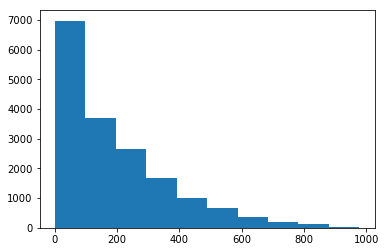

In [4]:
plt.hist(raw_data["cnt"])
plt.show()

In [5]:
raw_data["cnt"].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

According to the results above, most records fall into the 0-100, 100-200, 200-300 ranges.

In [6]:
raw_data.corr().loc["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

According to the correlation between "cnt" and other features, it seems the "hr" and "temp"("atemp") columns have a positive relationship. On the other hand, the "hum" column has a negative relationship. Since "cnt" is the total of the "casual" and "registered" columns, they should be disregarded.

Next, the bike rentals data for each day was examined.

In [7]:
data_by_date = raw_data.groupby("dteday", as_index=False).sum()
data_by_date.head(20)

,dteday,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,300,24,0,24,276,0,144,0,38,8.26,8.7270,19.34,3.8507,331,654,985
1,2011-01-02,828,23,0,23,271,0,0,0,45,8.36,8.1360,16.01,5.7164,131,670,801
2,2011-01-03,1287,22,0,22,271,0,22,22,22,4.32,4.1669,9.62,5.4628,120,1229,1349
3,2011-01-04,1863,23,0,23,273,0,46,23,24,4.60,4.8788,13.58,3.6868,108,1454,1562
4,2011-01-05,2392,23,0,23,273,0,69,23,23,5.22,5.2732,10.05,4.2987,82,1518,1600
5,2011-01-06,2921,23,0,23,273,0,92,23,31,4.70,5.3638,11.92,2.0600,88,1518,1606
6,2011-01-07,3450,23,0,23,273,0,115,23,39,4.52,4.8033,11.47,3.8807,148,1362,1510
7,2011-01-08,4164,24,0,24,276,0,144,0,41,3.96,3.8941,12.86,6.4033,68,891,959
8,2011-01-09,4740,24,0,24,276,0,0,0,24,3.32,2.7882,10.42,8.6868,54,768,822
9,2011-01-10,5316,24,0,24,276,0,24,24,32,3.62,3.6213,11.59,5.3584,41,1280,1321


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111bf1828>]], dtype=object)

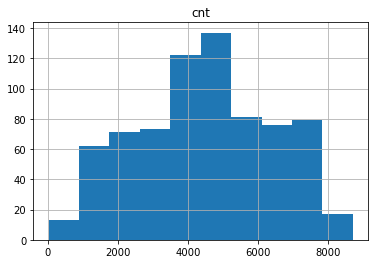

In [8]:
data_by_date.hist("cnt")

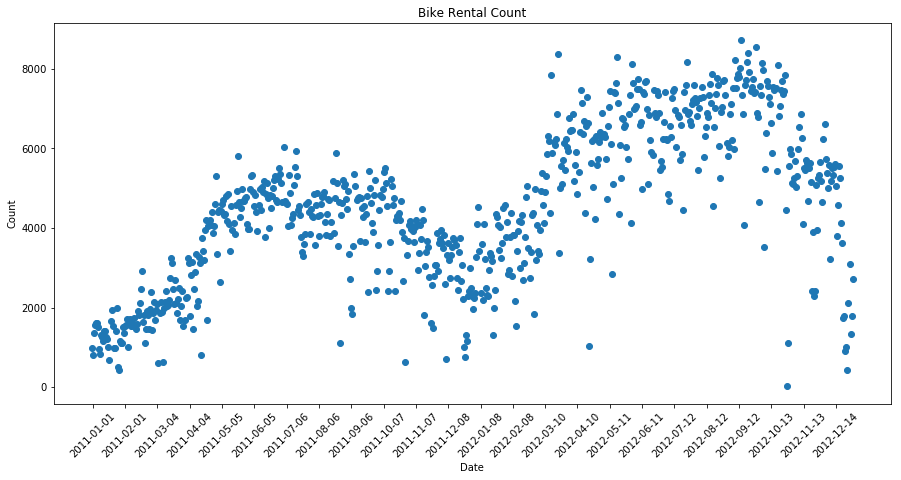

In [9]:
x_labels = data_by_date["dteday"]
x = range(len(x_labels))
y = data_by_date["cnt"]

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)

ax.scatter(x,y)

x_ticks = np.arange(1,len(x),31)
x_ticklabels = [x_labels[i] for i in range(0,len(x),31)]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels, rotation=45)

ax.set_xlabel("Date")
ax.set_ylabel("Count")
plt.title("Bike Rental Count")
plt.show()

The trends in the number of bike rentals in 2012 was larger than in 2011, which meant more people rented bikes. In both years, people tended to rent bikes between Apr and Oct more often than in other months. This implied there was a relationship between bike rentals and seasons/temperature.

After reading the data from the columns, several were chosen for further analyses.

In [10]:
cols = ["temp", "atemp", "hum", "windspeed", "cnt"]

# Applying the Linear Regression Model

Since "temp", "atemp", "hum", "windspeed" were already normalized, they were used without any further changes.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
data1 = raw_data[cols]
data1.head(5)

,temp,atemp,hum,windspeed,cnt
0,0.24,0.2879,0.81,0.0,16
1,0.22,0.2727,0.80,0.0,40
2,0.22,0.2727,0.80,0.0,32
3,0.24,0.2879,0.75,0.0,13
4,0.24,0.2879,0.75,0.0,1


The data was splitted into the train and test datasets.

In [13]:
features = data1.iloc[:,0:-1]
target = data1["cnt"]

In [14]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=5)

In [15]:
lr = LinearRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [16]:
mse = mean_squared_error(test_y, predictions)
np.sqrt(mse)

159.53238900043445

The value of root mean squre error was 159.5. To compare it to the values of the other models later, several RMSE and its mean were calculated.

In [17]:
random_state_list = [i for i in range(5,51,5)]
random_state_list

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [18]:
scores = {}
for i in random_state_list:
    train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(train_X, train_y)
    predictions = lr.predict(test_X)
    mse = mean_squared_error(test_y, predictions)
    scores[i] = np.sqrt(mse)

In [19]:
total = 0
for key, value in scores.items():
    total += value
mean_rmse = total / len(random_state_list)
mean_rmse

156.60362247902125

After 10 trials, the mean value of RMSE was 156.6.

# Cleaning the Data
To improve the accuracy, histograms of each column were referenced.

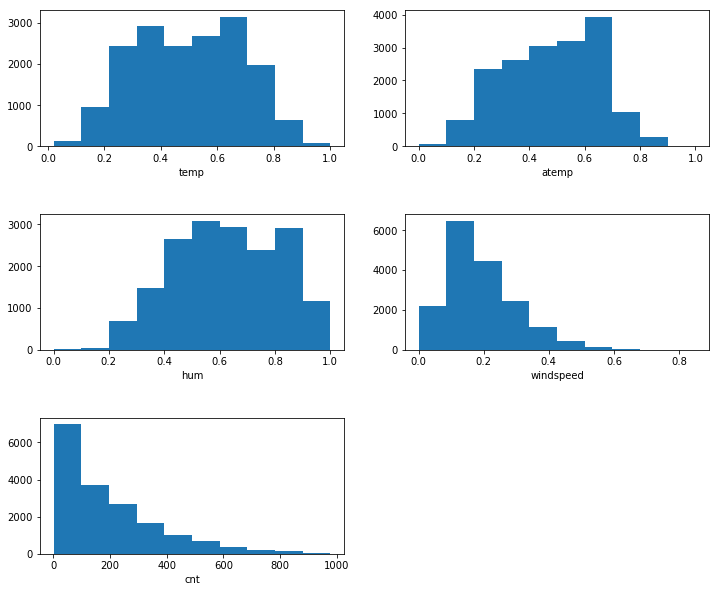

In [20]:
fig = plt.figure(figsize=(12,10))

for i in range(len(cols)):
    ax = fig.add_subplot(3,2,i+1)
    col = cols[i]
    ax.hist(data1[col])
    ax.set_xlabel(col)
plt.subplots_adjust(wspace=0.2, hspace=0.5)    
plt.show()

The distributions of windspeed and cnt were positively skewed. The extreme data in the cnt column might have led to a higher error. Thus, they were eliminated.

In [21]:
data1["cnt"].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

The records with cnt more than 300 were dropped.

In [22]:
data2 = data1[data1["cnt"] <= 300]

In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13488 entries, 0 to 17378
Data columns (total 5 columns):
temp         13488 non-null float64
atemp        13488 non-null float64
hum          13488 non-null float64
windspeed    13488 non-null float64
cnt          13488 non-null int64
dtypes: float64(4), int64(1)
memory usage: 632.2 KB


In [24]:
def calc_rmse(df):
    random_state_list = [i for i in range(5,51,5)]
    features = df.iloc[:,0:-1]
    target = df["cnt"]
    scores={}
    
    for i in random_state_list:
        train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=i)
        lr = LinearRegression()
        lr.fit(train_X, train_y)
        predictions = lr.predict(test_X)
        mse = mean_squared_error(test_y, predictions)
        scores[i] = np.sqrt(mse)
    return scores

In [25]:
scores2 = calc_rmse(data2)

In [26]:
print(scores2)

{5: 77.657984807097776, 10: 77.120659144309158, 15: 78.51595910483374, 20: 78.161949929828126, 25: 77.382135975965184, 30: 78.980068886961689, 35: 77.701504768449723, 40: 79.351629164328727, 45: 78.801597616491179, 50: 79.400977453523396}


In [27]:
def calc_mean_rmse(scores):
    total = 0
    for key, value in scores.items():
        total += value
    mean_rmse = total / len(random_state_list)
    return mean_rmse

In [28]:
rmse2 = calc_mean_rmse(scores2)
rmse2

78.307446685178874

By removing the extreme data from the cnt column, the value of rmse2 decreased to 78.3.

RMSE was calculated again with the different models and the original dataset.

# Applying the Decision Tree Model

In [29]:
data2.head()

,temp,atemp,hum,windspeed,cnt
0,0.24,0.2879,0.81,0.0,16
1,0.22,0.2727,0.80,0.0,40
2,0.22,0.2727,0.80,0.0,32
3,0.24,0.2879,0.75,0.0,13
4,0.24,0.2879,0.75,0.0,1


In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13488 entries, 0 to 17378
Data columns (total 5 columns):
temp         13488 non-null float64
atemp        13488 non-null float64
hum          13488 non-null float64
windspeed    13488 non-null float64
cnt          13488 non-null int64
dtypes: float64(4), int64(1)
memory usage: 1.2 MB


In [31]:
features = data2.iloc[:,:-1]
target = data2["cnt"]

In [32]:
features.head()

,temp,atemp,hum,windspeed
0,0.24,0.2879,0.81,0.0
1,0.22,0.2727,0.80,0.0
2,0.22,0.2727,0.80,0.0
3,0.24,0.2879,0.75,0.0
4,0.24,0.2879,0.75,0.0


In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=5)
reg = DecisionTreeRegressor(min_samples_leaf=5)
reg.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [35]:
predictions = reg.predict(test_X)

In [36]:
mse3 = mean_squared_error(test_y, predictions)
rmse3 = np.sqrt(mse3)
rmse3

82.44158131618137

In [37]:
# Calc rmse by using training data

predictions_2 = reg.predict(train_X)
mse3_2 = mean_squared_error(train_y, predictions_2)
rmse3_2 = np.sqrt(mse3_2)
rmse3_2

67.27758876696501

The RMSE values obtained from the test and the train datasets were 82.4 and 67.3 respectively. They were not vastly different from each other, which implied the model was not overfitted.

Since data2 was created using the "Groupby" method and the "sum" function, the values in each row were totaled. Thus, RMSE with the raw data was calculated again.

In [38]:
features = raw_data.iloc[:,2:-1]
target = raw_data["cnt"]

In [39]:
features.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [40]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=5)
reg = DecisionTreeRegressor(min_samples_leaf=5)
reg.fit(train_X, train_y)
predictions = reg.predict(test_X)
mse4 = mean_squared_error(test_y, predictions)
rmse4 = np.sqrt(mse4)
rmse4

4.7475015832314762

RMSE improved a lot by using the raw dataset. However, it was difficult to understand the relationship between the features and the number of bike rentals.<br>
Tha Random Tree Model was used with the modified data to check how RMSE would change.

# Applying Random Forest Model

In [41]:
features = data2.iloc[:,:-1]
target = data2["cnt"]

In [42]:
features.head()

,temp,atemp,hum,windspeed
0,0.24,0.2879,0.81,0.0
1,0.22,0.2727,0.80,0.0
2,0.22,0.2727,0.80,0.0
3,0.24,0.2879,0.75,0.0
4,0.24,0.2879,0.75,0.0


In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=5)
reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [45]:
predictions = reg.predict(test_X)

In [46]:
mse5 = mean_squared_error(test_y, predictions)
rmse5 = np.sqrt(mse5)
rmse5

78.131358727166287

By using the Random Forest Model, RMSE decreased a little bit comparing to rmse3 (= 82.5). If one changes the parameters, one could make the asumption that the value would decrese more.